# Devoir Big Data & Dataminig
### Professeurs: Mr Perrin & Mr Tabbone
A rendre le 15 Avril 2021

## But 
Le but de ce projet est de déterminer si un produit aura du succès ou non selon ses caractéristiques.
Nous nous situons donc dans le cadre d'un apprentissage supervisé. En effet, le but de ce devoir consiste à effectuer une prédiction sur le succès ou non (label) d'un produit en fonction de ses caractéristiques (features)

<img src="img/machineLearning.jpeg"/>

In [1]:
from pyspark.sql import SparkSession

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
from pyspark.sql.types import (StructField, StringType, 
                               IntegerType, TimestampType, DateType,
                               DoubleType, StructType)

In [4]:
from pyspark.sql.functions import countDistinct, avg, stddev, desc

In [5]:
from pyspark.sql.functions import format_number

In [6]:
import os

In [7]:
# os.path.abspath(os.getcwd())

In [8]:
spark = SparkSession.builder.appName('MiageML').getOrCreate()

## Phase I - Collecting Data
***
<img src="img/dataCollection.jpg"/>

1. Fetch data from csv files
2. Type data


In [43]:
## Customers
schema_customer = [
    StructField("customer_id", StringType(), True),
    StructField("customer_unique_id", StringType(), True),
    StructField("customer_zip_code_prefix", StringType(), True),
    StructField("customer_city", StringType(), True),
    StructField("customer_state", StringType(), True)
]
customer_struct = StructType(fields=schema_customer)

## Orders
schema_order = [
    StructField("order_id", StringType(), True),
    StructField("customer_id", StringType(), True),
    StructField("status", StringType(), True),
    StructField("purchase_at", StringType(), True),
    StructField("approved_at", StringType(), True),
    StructField("delvd_carrier_dt", StringType(), True),
    StructField("delvd_customer_dt", StringType(), True),
    StructField("estimated_delivery_dt", StringType(), True),        
]

order_struct = StructType(fields=schema_order)

## Order items
schema_order_items = [
    StructField("order_id", StringType(), True),
    StructField("order_item_id", IntegerType(), True),
    StructField("product_id", StringType(), True),
    StructField("seller_id", StringType(), True),
    StructField("shipping_limit_date", StringType(), True),
    StructField("price", DoubleType(), True),
    StructField("freight_value", DoubleType(), True),
  ]
order_items_struct = StructType(fields=schema_order_items)

## Product
## "product_id","product_category_name","product_name_lenght","product_description_lenght","product_photos_qty",
## "product_weight_g","product_length_cm","product_height_cm","product_width_cm"
schema_products = [
    StructField("product_id", StringType(), True),
    StructField("product_category_name", StringType(), True),
    StructField("product_name_lenght", IntegerType(), True),
    StructField("product_description_lenght", IntegerType(), True),
    StructField("product_photos_qty", DoubleType(), True),
    StructField("product_weight_g", DoubleType(), True),
    StructField("product_length_cm", DoubleType(), True),
    StructField("product_height_cm", DoubleType(), True),
    StructField("product_width_cm", DoubleType(), True)
  ]
products_struct = StructType(fields=schema_products)


## Order reviews
## "review_id","order_id","review_score","review_comment_title","review_comment_message","review_creation_date",
## "review_answer_timestamp"
schema_order_reviews = [
    StructField("review_id", StringType(), True),
    StructField("order_id", StringType(), True),
    StructField("review_score", IntegerType(), True),
    StructField("review_comment_title", StringType(), True),
    StructField("review_comment_message", StringType(), True),
    StructField("review_creation_date", StringType(), True),
    StructField("review_answer_timestamp", StringType(), True)
  ]
order_reviews_struct = StructType(fields=schema_order_reviews)

# Payments
schema_payment = [
        StructField("order_id", StringType(), True),
        StructField("payment_sequential", IntegerType(), True),
        StructField("payment_type", StringType(), True),
        StructField("payment_installments", IntegerType(), True),
        StructField("payment_value", DoubleType(), True)
    ]
payment_struct = StructType(fields=schema_payment)

# Sellers
schema_seller = [
        StructField("seller_id", StringType(), True),
        StructField("seller_zip_code_prefix", IntegerType(), True),
        StructField("seller_city", StringType(), True),
        StructField("seller_state", IntegerType(), True)
    ]
seller_struct = StructType(fields=schema_seller)


# Geolocalisation
schema_geo = [
        StructField("geolocation_zip_code_prefix", StringType(), True),
        StructField("geolocation_lat", DoubleType(), True),
        StructField("geolocation_lng", DoubleType(), True),
        StructField("geolocation_city", StringType(), True),
        StructField("geolocation_state", StringType(), True)
    ]
geo_struct = StructType(fields=schema_geo)

In [1]:
df_customers = spark.read\
.option("header", True)\
.schema(customer_struct)\
.csv("data/olist_customers_dataset.csv")

df_orders = spark.read.option("header", True)\
.option("inferSchema", False)\
.schema(order_struct)\
.csv("data/olist_orders_dataset.csv")

df_order_items = spark.read.option("header", True)\
.option("inferSchema", False)\
.schema(order_items_struct)\
.csv("data/olist_order_items_dataset.csv")

df_products = spark.read.option("header", True)\
.option("inferSchema", False)\
.schema(products_struct)\
.csv("data/olist_products_dataset.csv")

df_order_reviews = spark.read.option("header", True)\
.option("inferSchema", False)\
.schema(order_reviews_struct)\
.csv("data/olist_order_reviews_dataset.csv")

df_payments = spark.read.option("header", True)\
.option("inferSchema", False)\
.schema(payment_struct)\
.csv("data/olist_order_payments_dataset.csv")

df_sellers = spark.read.option("header", True)\
.option("inferSchema", False)\
.schema(seller_struct)\
.csv("data/olist_sellers_dataset.csv")

df_geo = spark.read.option("header", True)\
.option("inferSchema", False)\
.schema(geo_struct)\
.csv("data/olist_geolocation_dataset.csv")

NameError: name 'spark' is not defined

## Cleanning Data
***

<img src="img/dataCleaning.jpg"/>

1. Orders<BR>
> KEEP  : "order_id","customer_id", "status","purchase_at" <BR>
> REMOVE: "approved_at","delvd_carrier_dt","delvd_customer_dt","estimated_delivery_dt"

2. Order items<BR>
> KEEP  : "order_id","product_id","seller_id","price","freight_value" <BR>
> REMOVE: "order_item_id","shipping_limit_date"
    
3. Order reviews<BR>
> KEEP  : "order_id","review_score"<BR>
> REMOVE: "review_id","review_comment_title","review_comment_message","review_creation_date","review_answer_timestamp"
    
4. Customers<BR>
> KEEP  : "customer_id", "customer_zip_code_prefix","customer_city","customer_state"<BR>
> REMOVE: "customer_unique_id"
    
4. Payments<BR>
> KEEP  : "order_id","payment_type","payment_value"<BR>
> REMOVE: "payment_sequential","payment_installments"       

In [11]:
# Orders
df_orders.groupBy("status").count().show()
# df_order_items.printSchema()
rv_order_col=["approved_at","delvd_carrier_dt","delvd_customer_dt","estimated_delivery_dt"]
df_orders_light = df_orders.drop(*rv_order_col)
df_orders_light.printSchema()

+-----------+-----+
|     status|count|
+-----------+-----+
|    shipped| 1107|
|   canceled|  625|
|   approved|    2|
|   invoiced|  314|
|    created|    5|
|  delivered|96478|
|unavailable|  609|
| processing|  301|
+-----------+-----+

root
 |-- order_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- status: string (nullable = true)
 |-- purchase_at: string (nullable = true)



In [12]:
# Order items
rv_items_col=["order_item_id","shipping_limit_date"]
df_orditems_light = df_order_items.drop(*rv_items_col)
df_orditems_light.printSchema()

root
 |-- order_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- price: double (nullable = true)
 |-- freight_value: double (nullable = true)



In [13]:
df_orditems_light.select(countDistinct("product_id")).show()
df_items_cnt = df_orditems_light.groupBy("product_id").count()
df_items_cnt.orderBy(df_items_cnt["count"].desc()).show()

+--------------------------+
|count(DISTINCT product_id)|
+--------------------------+
|                     32951|
+--------------------------+

+--------------------+-----+
|          product_id|count|
+--------------------+-----+
|aca2eb7d00ea1a7b8...|  527|
|99a4788cb24856965...|  488|
|422879e10f4668299...|  484|
|389d119b48cf3043d...|  392|
|368c6c730842d7801...|  388|
|53759a2ecddad2bb8...|  373|
|d1c427060a0f73f6b...|  343|
|53b36df67ebb7c415...|  323|
|154e7e31ebfa09220...|  281|
|3dd2a17168ec895c7...|  274|
|2b4609f8948be1887...|  260|
|7c1bd920dbdf22470...|  231|
|a62e25e09e05e6faf...|  226|
|5a848e4ab52fd5445...|  197|
|bb50f2e236e5eea01...|  195|
|e0d64dcfaa3b6db5c...|  194|
|e53e557d5a159f5aa...|  183|
|42a2c92a0979a949c...|  183|
|b532349fe46b38fbc...|  169|
|35afc973633aaeb6b...|  165|
+--------------------+-----+
only showing top 20 rows



In [14]:
df_products.count()

32951

In [15]:
# Order reviews
rv_reviews_col=["review_id","review_comment_title","review_comment_message","review_creation_date","review_answer_timestamp"]
df_ordreviews_light = df_order_reviews.drop(*rv_reviews_col)
df_ordreviews_light.printSchema()

root
 |-- order_id: string (nullable = true)
 |-- review_score: integer (nullable = true)



In [16]:
# Customers
rv_customers_col=["customer_unique_id"]
df_customers_light = df_customers.drop(*rv_customers_col)
df_customers_light.printSchema()

root
 |-- customer_id: string (nullable = true)
 |-- customer_zip_code_prefix: string (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_state: string (nullable = true)



In [17]:
# Payments
rv_payments_col=["payment_sequential","payment_installments"]
df_pay_light = df_payments.drop(*rv_payments_col)
df_pay_light.printSchema()

root
 |-- order_id: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- payment_value: double (nullable = true)



In [46]:
# Sellers
#rv_sellers_col=["seller_id"]
#df_sellers_light = df_sellers.drop(*rv_sellers_col)
#df_sellers_light.printSchema()

root
 |-- seller_zip_code_prefix: integer (nullable = true)
 |-- seller_city: string (nullable = true)
 |-- seller_state: integer (nullable = true)



In [47]:
# Geolocation
rv_geo_col=["geolocation_lat","geolocation_lng"]
df_geo_light = df_geo.drop(*rv_geo_col)
df_geo_light.printSchema()

root
 |-- geolocation_zip_code_prefix: string (nullable = true)
 |-- geolocation_city: string (nullable = true)
 |-- geolocation_state: string (nullable = true)



## JOINING Dataset
***
join(right: Dataset[_], joinExprs: Column, joinType: String): DataFrame
join(right: Dataset[_]): DataFrame

In [57]:
# joining
# orders
# order items
# order reviews
# order payment
# customers
# sellers
# geolocation
df_features = df_orders_light.join(df_orditems_light, df_orders_light["order_id"] == df_orditems_light["order_id"], "inner")\
         .join(df_ordreviews_light,df_orders_light["order_id"] == df_ordreviews_light["order_id"], "inner")\
         .join(df_pay_light,df_orders_light["order_id"] == df_pay_light["order_id"], "inner")\
         .drop("order_id")\
         .join(df_customers_light,df_orders_light["customer_id"] == df_customers_light["customer_id"], "inner")\
         .drop("customer_id")\
.join(df_sellers,df_orditems_light["seller_id"] == df_sellers["seller_id"], "inner")\
.drop("seller_id")\
.join(df_geo_light,df_geo_light["geolocation_zip_code_prefix"] == df_customers_light["customer_zip_code_prefix"], "inner")\
.join(df_geo_light,df_geo_light["geolocation_zip_code_prefix"] == df_sellers["seller_zip_code_prefix"], "inner")\
.drop("seller_zip_code_prefix")\
.drop("customer_zip_code_prefix")\
.drop("geolocation_zip_code_prefix")\
.show()

# df_features[0]

+---------+--------------+--------------------+-----+-------------+------------+------------+-------------+-------------+--------------+-----------+------------+----------------+-----------------+----------------+-----------------+
|   status|   purchase_at|          product_id|price|freight_value|review_score|payment_type|payment_value|customer_city|customer_state|seller_city|seller_state|geolocation_city|geolocation_state|geolocation_city|geolocation_state|
+---------+--------------+--------------------+-----+-------------+------------+------------+-------------+-------------+--------------+-----------+------------+----------------+-----------------+----------------+-----------------+
|delivered|12.04.18 17:25|9d0bb30eed8018466...|19.95|         8.29|           5|      boleto|        28.24|    sao paulo|            SP|  sao paulo|        null|       sao paulo|               SP|       sao paulo|               SP|
|delivered|12.04.18 17:25|9d0bb30eed8018466...|19.95|         8.29|     

In [19]:
#df_orders.withColumn('purchase_at_dt', to_date(col('purchase_at'),'dd.mm.yyyy'))
df_orders.withColumn('purchase_at', df_orders['purchase_at'].cast(DateType()))
df_orders.withColumn('approved_at', df_orders['approved_at'].cast(DateType()))
df_orders.withColumn('delvd_carrier_dt', df_orders['delvd_carrier_dt'].cast(DateType()))
df_orders.withColumn('delvd_customer_dt', df_orders['delvd_customer_dt'].cast(DateType()))
df_orders.withColumn('estimated_delivery_dt', df_orders['estimated_delivery_dt'].cast(DateType()))

DataFrame[order_id: string, customer_id: string, status: string, purchase_at: string, approved_at: string, delvd_carrier_dt: string, delvd_customer_dt: string, estimated_delivery_dt: date]

In [20]:
df_payments.show()

+--------------------+------------------+------------+--------------------+-------------+
|            order_id|payment_sequential|payment_type|payment_installments|payment_value|
+--------------------+------------------+------------+--------------------+-------------+
|b81ef226f3fe1789b...|                 1| credit_card|                   8|        99.33|
|a9810da82917af2d9...|                 1| credit_card|                   1|        24.39|
|25e8ea4e93396b6fa...|                 1| credit_card|                   1|        65.71|
|ba78997921bbcdc13...|                 1| credit_card|                   8|       107.78|
|42fdf880ba16b47b5...|                 1| credit_card|                   2|       128.45|
|298fcdf1f73eb413e...|                 1| credit_card|                   2|        96.12|
|771ee386b001f0620...|                 1| credit_card|                   1|        81.16|
|3d7239c394a212faa...|                 1| credit_card|                   3|        51.84|
|1f78449c8

In [21]:
df_payments.groupBy("payment_type").sum("payment_value").show()


+------------+--------------------+
|payment_type|  sum(payment_value)|
+------------+--------------------+
|      boleto|  2869361.2699999996|
| not_defined|                 0.0|
| credit_card|1.2542084189999508E7|
|     voucher|  379436.87000000046|
|  debit_card|  217989.79000000018|
+------------+--------------------+



<AxesSubplot:>

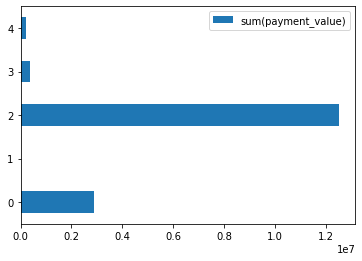

In [22]:
TotalPerpymtType = df_payments.groupBy("payment_type").sum("payment_value")
TotalPerpymtType.toPandas().plot(kind="barh", legend=True)

In [23]:
x = TotalPerpymtType.select("payment_type").toPandas().to_numpy
y = TotalPerpymtType.select("sum(payment_value)").toPandas().to_numpy
#x = TotalPerpymtType["payment_type"].to_numpy()
# select("payment_type").toPandas().values
#y = TotalPerpymtType.select("sum(payment_value)")
#plt.bar(x,y)




In [24]:
df_payments.agg({'payment_value':'max'}).show()

+------------------+
|max(payment_value)|
+------------------+
|          13664.08|
+------------------+



In [25]:
group_by_paymttype = df_payments.groupBy("payment_type")
group_by_paymttype.agg({'payment_value':'sum'}).show()

+------------+--------------------+
|payment_type|  sum(payment_value)|
+------------+--------------------+
|      boleto|  2869361.2699999996|
| not_defined|                 0.0|
| credit_card|1.2542084189999508E7|
|     voucher|  379436.87000000046|
|  debit_card|  217989.79000000018|
+------------+--------------------+



In [26]:
sales_stddev = df_payments.select(stddev('payment_value').alias('stddev_sales'))

In [27]:
sales_customer = df_payments.select(df_payments['payment_type'], df_payments['payment_value'].alias('sales')).orderBy(df_payments['payment_value'].desc()).show()

+------------+--------+
|payment_type|   sales|
+------------+--------+
| credit_card|13664.08|
|      boleto| 7274.88|
| credit_card| 6929.31|
|      boleto| 6922.21|
|      boleto| 6726.66|
|      boleto| 6081.54|
| credit_card| 4950.34|
| credit_card| 4809.44|
| credit_card| 4764.34|
| credit_card| 4681.78|
| credit_card| 4513.32|
|  debit_card|  4445.5|
| credit_card| 4175.26|
|  debit_card| 4163.51|
| credit_card| 4042.74|
| credit_card| 4016.91|
|      boleto| 3979.55|
| credit_card|  3899.0|
| credit_card|  3826.8|
| credit_card| 3792.59|
+------------+--------+
only showing top 20 rows



In [28]:
sales_stddev.select(format_number('stddev_sales',2).alias('standard deviation sales')).show()

+------------------------+
|standard deviation sales|
+------------------------+
|                  217.49|
+------------------------+



In [29]:
sales_stddev.select(format_number('stddev_sales',2).alias('stdd')).show()

+------+
|  stdd|
+------+
|217.49|
+------+



In [30]:
df_customers.select("customer_id").show()

+--------------------+
|         customer_id|
+--------------------+
|06b8999e2fba1a1fb...|
|18955e83d337fd6b2...|
|4e7b3e00288586ebd...|
|b2b6027bc5c5109e5...|
|4f2d8ab171c80ec83...|
|879864dab9bc30475...|
|fd826e7cf63160e53...|
|5e274e7a0c3809e14...|
|5adf08e34b2e99398...|
|4b7139f34592b3a31...|
|9fb35e4ed6f0a14a4...|
|5aa9e4fdd4dfd2095...|
|b2d1536598b73a9ab...|
|eabebad39a88bb6f5...|
|1f1c7bf1c9b041b29...|
|206f3129c0e4d7d0b...|
|a7c125a0a07b75146...|
|c5c61596a3b6bd0ce...|
|9b8ce803689b3562d...|
|49d0ea0986edde72d...|
+--------------------+
only showing top 20 rows



In [31]:
df_customers.createOrReplaceTempView("clients")

In [32]:
res = df_customers.filter("customer_state in ('SP','SC','MG')").select('customer_id','customer_city','customer_state').collect()

In [33]:
row = res [0]

In [34]:
row.asDict()["customer_city"]

'franca'

In [35]:
res = spark.sql("SELECT * from clients where customer_city <> 'sao paulo'")

In [36]:
res.show()

+--------------------+--------------------+------------------------+--------------------+--------------+
|         customer_id|  customer_unique_id|customer_zip_code_prefix|       customer_city|customer_state|
+--------------------+--------------------+------------------------+--------------------+--------------+
|06b8999e2fba1a1fb...|861eff4711a542e4b...|                   14409|              franca|            SP|
|18955e83d337fd6b2...|290c77bc529b7ac93...|                   09790|sao bernardo do c...|            SP|
|b2b6027bc5c5109e5...|259dac757896d24d7...|                   08775|     mogi das cruzes|            SP|
|4f2d8ab171c80ec83...|345ecd01c38d18a90...|                   13056|            campinas|            SP|
|879864dab9bc30475...|4c93744516667ad3b...|                   89254|      jaragua do sul|            SC|
|5e274e7a0c3809e14...|57b2a98a409812fe9...|                   35182|             timoteo|            MG|
|5adf08e34b2e99398...|1175e95fb47ddff9d...|            

## Transforming Model
***
1. Join tables
2. Project into one single tables

## Analysing Data
***
1. Comparing features with the label 1 as "Purchased" or 0 as "Not Purchase" 